In [43]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

DATAPATH = "../data"

In [ ]:
def format_sales(df, stores_df, oil_df, holidays_df, transactions_df):
    df = df.merge(stores_df, on='store_nbr', how='left')
    df = df.merge(oil_df, on='date', how='left')
    df = df.merge(transactions_df, on=['date', 'store_nbr'], how='left')

    lb = LabelEncoder()
    df['family'] = lb.fit_transform(df['family'])
    df['city'] = lb.fit_transform(df['city'])
    df['state'] = lb.fit_transform(df['state'])
    df['type'] = lb.fit_transform(df['type'])

    df = df.merge(holidays_df[['date', 'holiday']], on='date', how='left')
    df['holiday'].fillna(0, inplace=True)
    df['holiday'] = df['holiday'].astype(int)

    lags = [1, 7, 14]
    for lag in lags:
        df[f'oil_lag_{lag}'] = df['dcoilwtico'].shift(lag)

    df['payday'] = ((df['date'].dt.day == 15) | df['date'].dt.is_month_end).astype(int)
    df['weekday'] = df['date'].dt.weekday
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    df['is_weekday'] = 0
    df.loc[df['weekday'] < 5, 'is_weekday'] = 1

    df.dropna(inplace=True)

    df = df.set_index('date')

    return df


def read_sales(data_path):
    sample_sub = pd.read_csv(data_path + '/store-sales/sample_submission.csv')
    stores_df = pd.read_csv(data_path + '/store-sales/stores.csv')

    train_df = pd.read_csv(data_path + '/store-sales/train.csv')
    train_df['date'] = pd.to_datetime(train_df['date'])

    test_df = pd.read_csv(data_path + '/store-sales/test.csv')
    test_df['date'] = pd.to_datetime(test_df['date'])

    oil_df = pd.read_csv(data_path + '/store-sales/oil.csv')
    oil_df['date'] = pd.to_datetime(oil_df['date'])

    holidays_df = pd.read_csv(data_path + '/store-sales/holidays_events.csv')
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    holidays_df['holiday'] = 1

    transactions_df = pd.read_csv(data_path + '/store-sales/transactions.csv')
    transactions_df['date'] = pd.to_datetime(transactions_df['date'])

    train_df = format_sales(train_df, stores_df, oil_df, holidays_df, transactions_df)
    test_df = format_sales(test_df, stores_df, oil_df, holidays_df, transactions_df)

    return train_df, test_df, sample_sub

In [44]:
df = read_sales(DATAPATH)

print(df.shape)
df.head()

(3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [45]:
df['date'] = pd.to_datetime(df['date'])

encoder = LabelEncoder()
encoder.fit(df['family'])
df['family'] = encoder.transform(df['family'])

df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,0,0.0,0
1,1,2013-01-01,1,1,0.0,0
2,2,2013-01-01,1,2,0.0,0
3,3,2013-01-01,1,3,0.0,0
4,4,2013-01-01,1,4,0.0,0


In [46]:
print(df.dtypes)
df = df.set_index('date')

id                      int64
date           datetime64[ns]
store_nbr               int64
family                  int32
sales                 float64
onpromotion             int64
dtype: object


In [47]:
print(df.isna().sum())

id             0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [48]:
df.sample(5)

,id,store_nbr,family,sales,onpromotion
date,,,,,
2014-04-16,836893,40,13,5.0,0
2015-03-01,1403630,42,8,0.0,0
2014-05-23,902695,37,13,26.0,0
2014-03-20,789047,48,17,1.0,0
2017-04-03,2760701,2,20,6.0,0


<Axes: xlabel='date'>

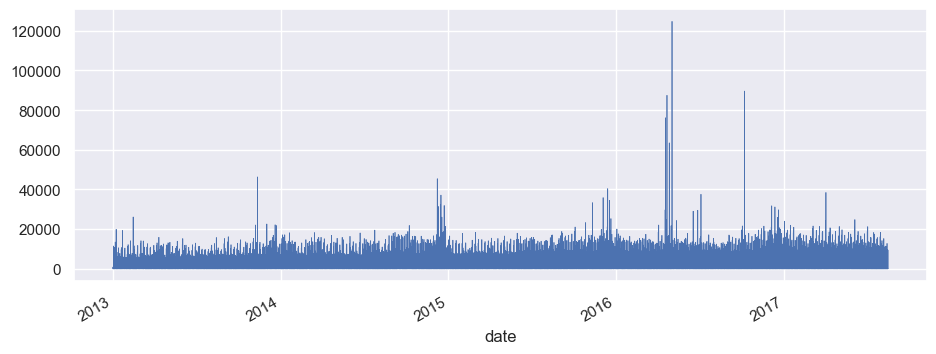

In [49]:
df['sales'].plot(linewidth=0.5)

In [50]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday

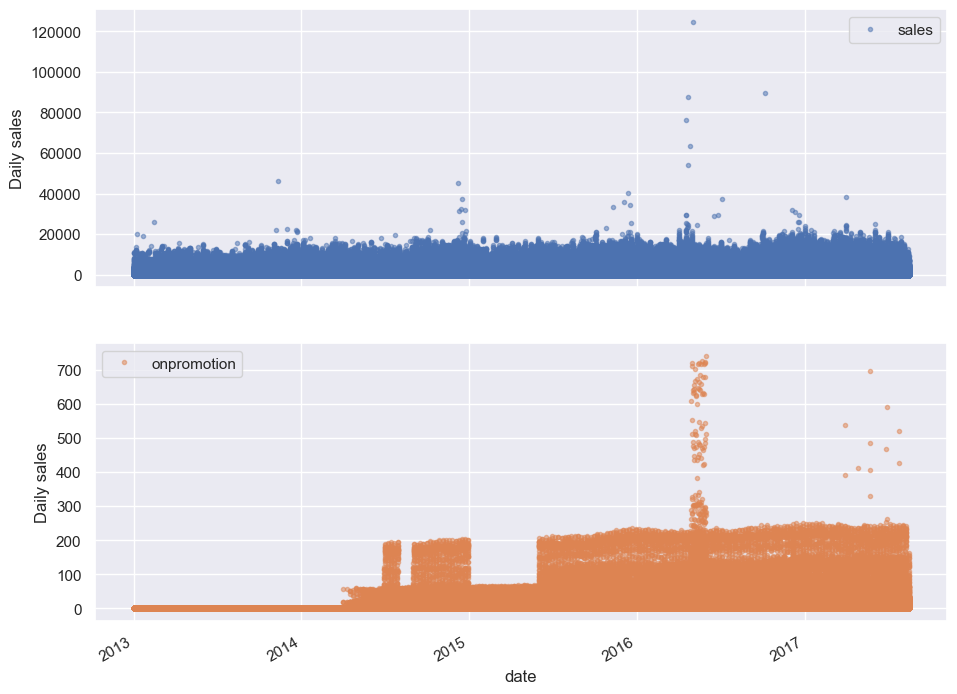

In [51]:
plot_cols = ['sales', 'onpromotion']

axes = df[plot_cols].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

for ax in axes:
    ax.set_ylabel('Daily sales')

Text(0, 0.5, 'Daily sales')

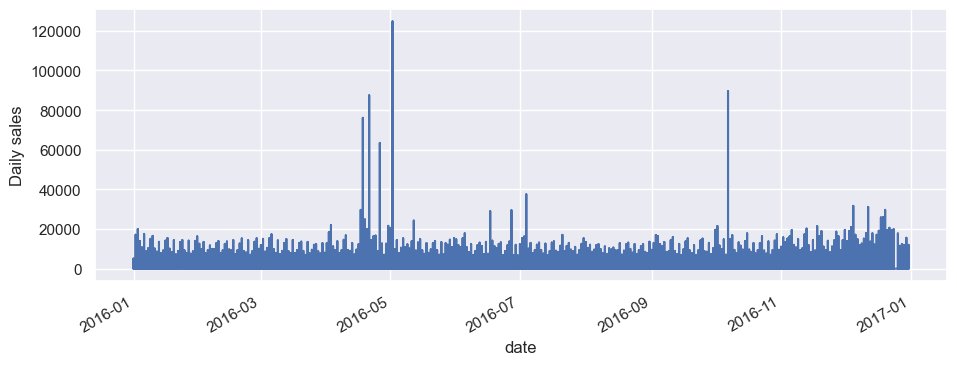

In [52]:
ax = df.loc['2016', 'sales'].plot()
ax.set_ylabel('Daily sales')

Text(0, 0.5, 'Daily sales')

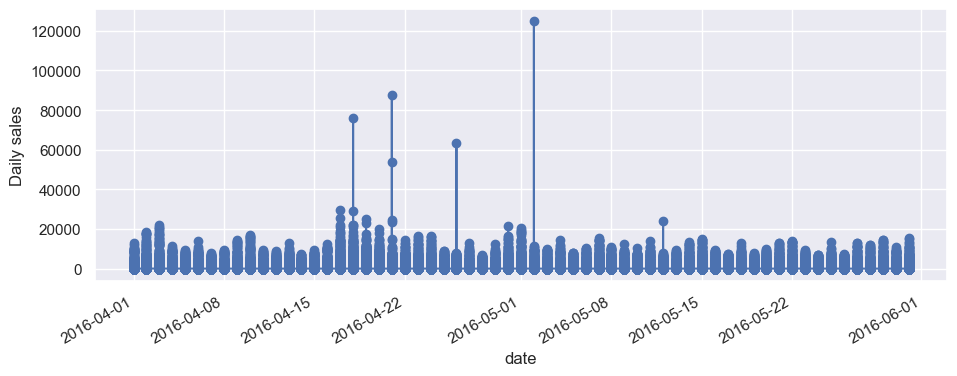

In [58]:
ax = df.loc['2016-04':'2016-05', 'sales'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily sales')

In [62]:
df.loc['2016-04':'2016-05'].sort_values(by=['sales'], ascending=False)

,id,store_nbr,family,sales,onpromotion,year,month,weekday
date,,,,,,,,
2016-05-02,2163723,2,12,124717.000,59,2016,5,0
2016-04-21,2144154,20,12,87438.516,53,2016,4,3
2016-04-18,2139699,45,12,76090.000,38,2016,4,0
2016-04-26,2153031,2,12,63434.000,30,2016,4,1
2016-04-21,2145045,45,12,53874.000,44,2016,4,3
...,...,...,...,...,...,...,...,...
2016-05-14,2185677,35,21,0.000,0,2016,5,5
2016-05-24,2203526,36,17,0.000,0,2016,5,1
2016-05-03,2166487,47,4,0.000,0,2016,5,1


In [63]:
df.sort_values(by=['sales'], ascending=False)

,id,store_nbr,family,sales,onpromotion,year,month,weekday
date,,,,,,,,
2016-05-02,2163723,2,12,124717.000,59,2016,5,0
2016-10-07,2445984,39,24,89576.360,0,2016,10,4
2016-04-21,2144154,20,12,87438.516,53,2016,4,3
2016-04-18,2139699,45,12,76090.000,38,2016,4,0
2016-04-26,2153031,2,12,63434.000,30,2016,4,1
...,...,...,...,...,...,...,...,...
2014-08-11,1044576,18,27,0.000,0,2014,8,0
2014-08-11,1044575,18,26,0.000,0,2014,8,0
2016-07-22,2309044,47,1,0.000,0,2016,7,4


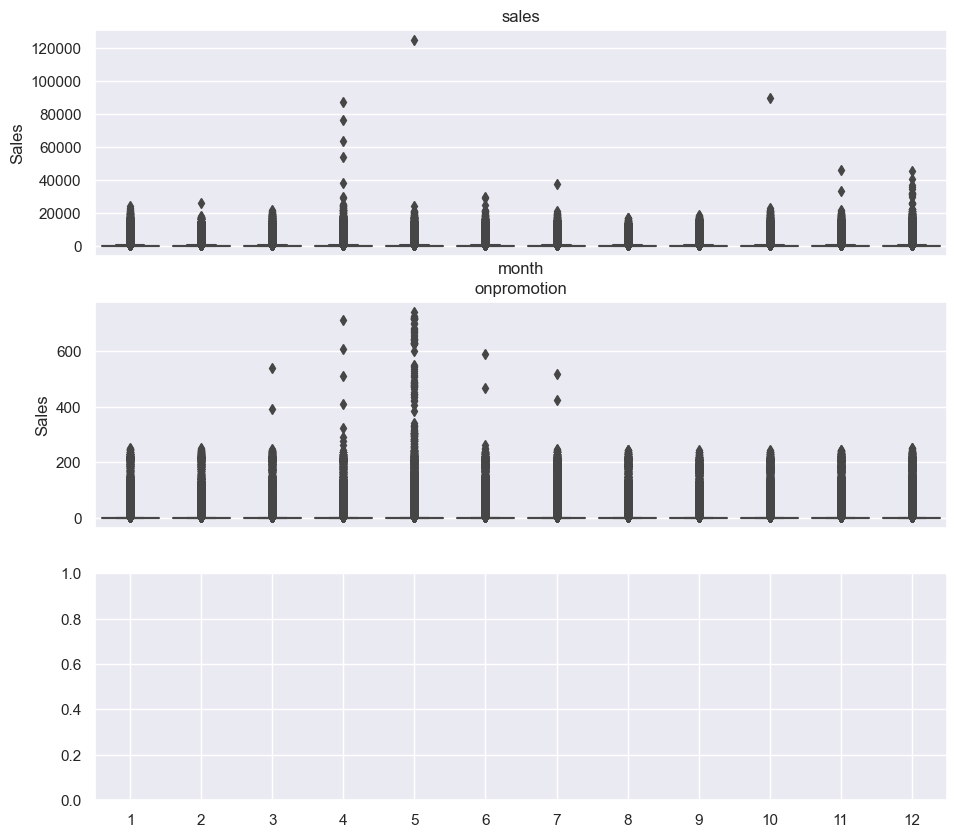

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(plot_cols, axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax)
    ax.set_ylabel('Sales')
    ax.set_title(name)

# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

<Axes: xlabel='family', ylabel='count'>

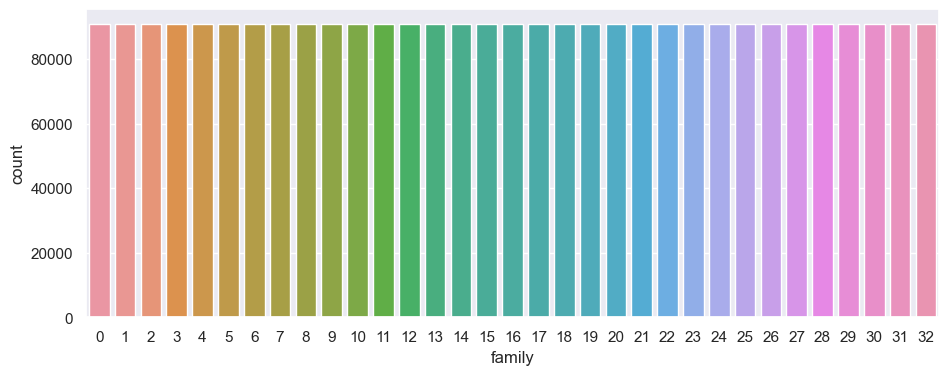

In [55]:
sns.countplot(x=df['family'])

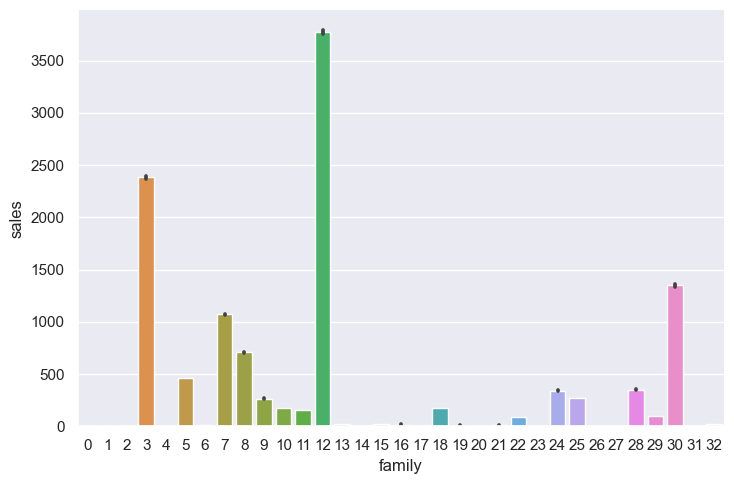

In [56]:
sns.catplot(data=df, x="family", y="sales", kind="bar", aspect=1.5)
